In [207]:
from keras.datasets import mnist
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.utils._testing import ignore_warnings
import matplotlib.pyplot as plt

# Übungsblatt 3 (komische Zählung)

In [208]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [209]:
param_grid = ParameterGrid({
        'max_iter': [5, 10, 15],
        'hidden_layer_sizes': [
            (20, 20),
            (20, 20, 20),
            (20, 20, 20, 20),
        ],
        'learning_rate_init': [0.1, 0.01],
        'solver': ['adam', 'sgd', 'lbfgs']  # sgd requires a activation other than relu
    })

In [210]:
@ignore_warnings(category=ConvergenceWarning)
def score(mlp):
    mlp.fit(x_train_flat[:1000], y_train[:1000])
    # mlp.fit(x_train_flat, y_train)
    y_predicted = mlp.predict(x_test_flat)
    return {
        'f1': f1_score(y_test, y_predicted, average='micro'),
        'accuracy': accuracy_score(y_test, y_predicted),
        'recall': recall_score(y_test, y_predicted, average='micro'),
        'precision': precision_score(y_test, y_predicted, average='micro')
    }

scores = pd.DataFrame({tuple(params.values()): score(MLPClassifier(random_state=42, activation="logistic", **params)) for params in param_grid}).T

In [211]:
scores

f1  accuracy  recall  precision
(20, 20)         0.10 5  adam   0.3120    0.3120  0.3120     0.3120
                         sgd    0.3080    0.3080  0.3080     0.3080
                         lbfgs  0.2592    0.2592  0.2592     0.2592
                      10 adam   0.3283    0.3283  0.3283     0.3283
                         sgd    0.4754    0.4754  0.4754     0.4754
                         lbfgs  0.5077    0.5077  0.5077     0.5077
                      15 adam   0.3348    0.3348  0.3348     0.3348
                         sgd    0.5002    0.5002  0.5002     0.5002
                         lbfgs  0.4943    0.4943  0.4943     0.4943
                 0.01 5  adam   0.3711    0.3711  0.3711     0.3711
                         sgd    0.2026    0.2026  0.2026     0.2026
                         lbfgs  0.2592    0.2592  0.2592     0.2592
                      10 adam   0.4819    0.4819  0.4819     0.4819
                         sgd    0.2565    0.2565  0.2565     0.2565
                         lbfgs  0.5077    0.5077  0.5077     0.5077
                      15 adam   0.5562    0.5562  0.5562     0.5562
                         sgd    0.2669    0.2669  0.2669     0.2669
                         lbfgs  0.4943    0.4943  0.4943     0.4943
(20, 20, 20)     0.10 5  adam   0.1028    0.1028  0.1028     0.1028
                         sgd    0.2020    0.2020  0.2020     0.2020
                         lbfgs  0.1680    0.1680  0.1680     0.1680
                      10 adam   0.2060    0.2060  0.2060     0.2060
                         sgd    0.1858    0.1858  0.1858     0.1858
                         lbfgs  0.2933    0.2933  0.2933     0.2933
                      15 adam   0.1983    0.1983  0.1983     0.1983
                         sgd    0.3215    0.3215  0.3215     0.3215
                         lbfgs  0.3636    0.3636  0.3636     0.3636
                 0.01 5  adam   0.2973    0.2973  0.2973     0.2973
                         sgd    0.0982    0.0982  0.0982     0.0982
                         lbfgs  0.1680    0.1680  0.1680     0.1680
                      10 adam   0.3222    0.3222  0.3222     0.3222
                         sgd    0.1503    0.1503  0.1503     0.1503
                         lbfgs  0.2933    0.2933  0.2933     0.2933
                      15 adam   0.4346    0.4346  0.4346     0.4346
                         sgd    0.1591    0.1591  0.1591     0.1591
                         lbfgs  0.3636    0.3636  0.3636     0.3636
(20, 20, 20, 20) 0.10 5  adam   0.1028    0.1028  0.1028     0.1028
                         sgd    0.1135    0.1135  0.1135     0.1135
                         lbfgs  0.1028    0.1028  0.1028     0.1028
                      10 adam   0.1028    0.1028  0.1028     0.1028
                         sgd    0.1028    0.1028  0.1028     0.1028
                         lbfgs  0.1028    0.1028  0.1028     0.1028
                      15 adam   0.1028    0.1028  0.1028     0.1028
                         sgd    0.1028    0.1028  0.1028     0.1028
                         lbfgs  0.2872    0.2872  0.2872     0.2872
                 0.01 5  adam   0.2128    0.2128  0.2128     0.2128
                         sgd    0.1135    0.1135  0.1135     0.1135
                         lbfgs  0.1028    0.1028  0.1028     0.1028
                      10 adam   0.2109    0.2109  0.2109     0.2109
                         sgd    0.1028    0.1028  0.1028     0.1028
                         lbfgs  0.1028    0.1028  0.1028     0.1028
                      15 adam   0.2153    0.2153  0.2153     0.2153
                         sgd    0.1028    0.1028  0.1028     0.1028
                         lbfgs  0.2872    0.2872  0.2872     0.2872

In [212]:
scores.groupby(level=[0]).mean()

,f1,accuracy,recall,precision
"(20, 20)",0.384239,0.384239,0.384239,0.384239
"(20, 20, 20)",0.240439,0.240439,0.240439,0.240439
"(20, 20, 20, 20)",0.142844,0.142844,0.142844,0.142844


In [213]:
scores.groupby(level=[1]).mean()

,f1,accuracy,recall,precision
0.01,0.264219,0.264219,0.264219,0.264219
0.10,0.247463,0.247463,0.247463,0.247463


In [214]:
scores.groupby(level=[2]).mean()

,f1,accuracy,recall,precision
5,0.194256,0.194256,0.194256,0.194256
10,0.262961,0.262961,0.262961,0.262961
15,0.310306,0.310306,0.310306,0.310306


In [215]:
scores.groupby(level=[3]).mean()

,f1,accuracy,recall,precision
adam,0.271828,0.271828,0.271828,0.271828
lbfgs,0.286544,0.286544,0.286544,0.286544
sgd,0.209150,0.209150,0.209150,0.209150


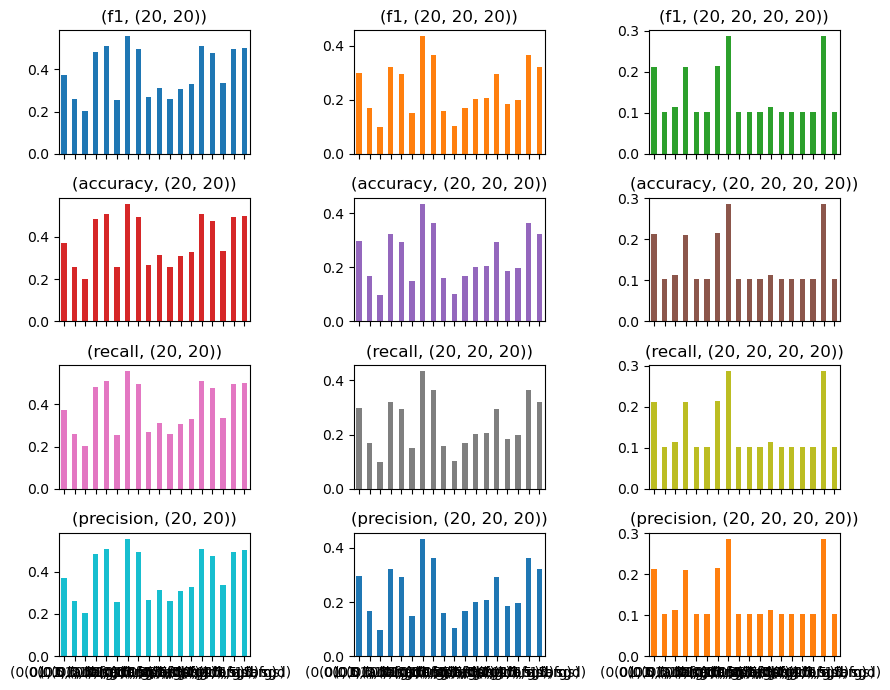

In [216]:
# Number of Layers
scores.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(4, 3), legend=False)
plt.tight_layout()

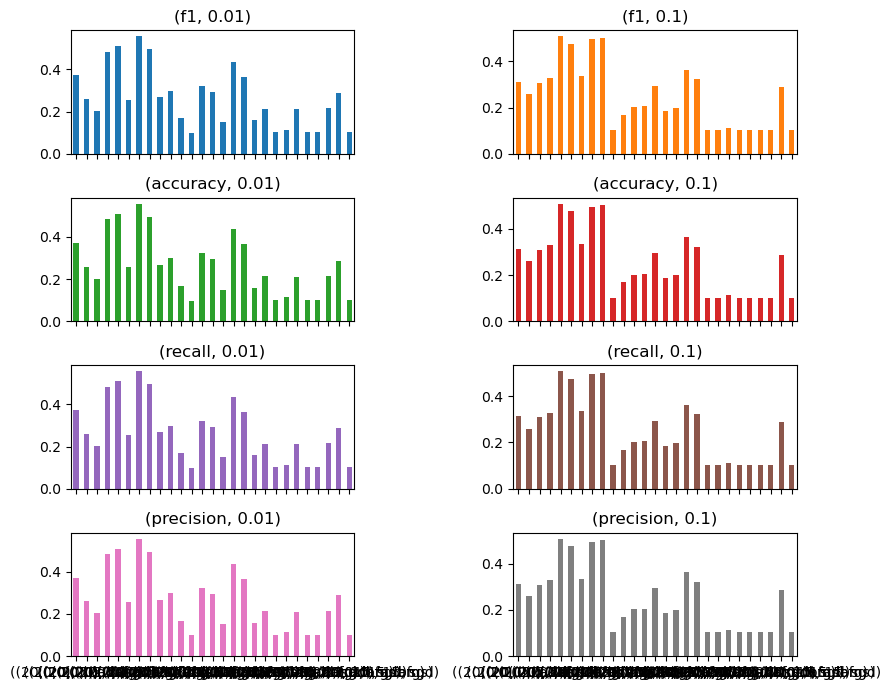

In [217]:
# Number of Layers
scores.unstack(level=1).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(4, 2), legend=False)
plt.tight_layout()

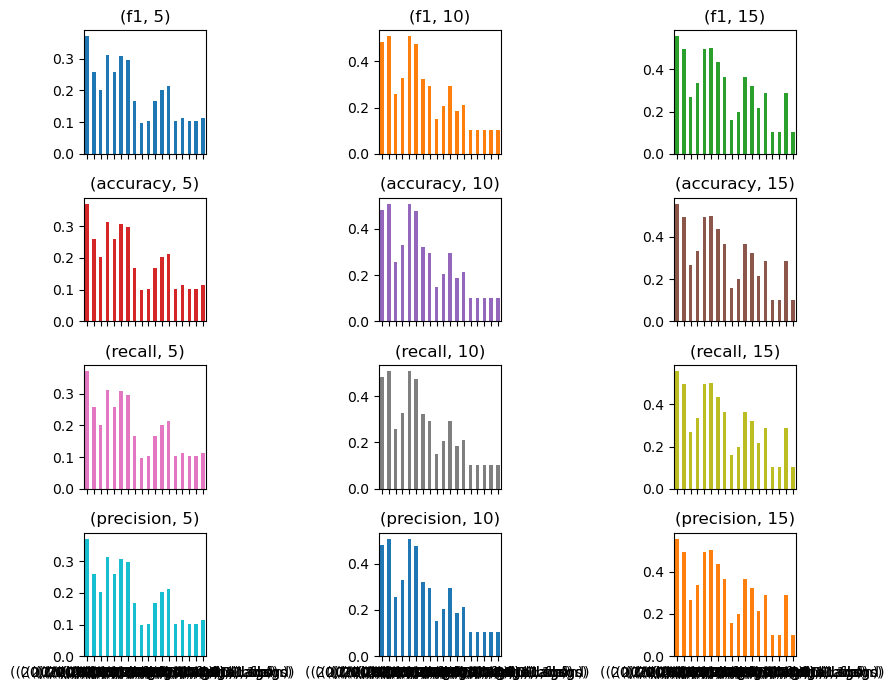

In [218]:
# Number of Layers
scores.unstack(level=2).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(4, 3), legend=False)
plt.tight_layout()

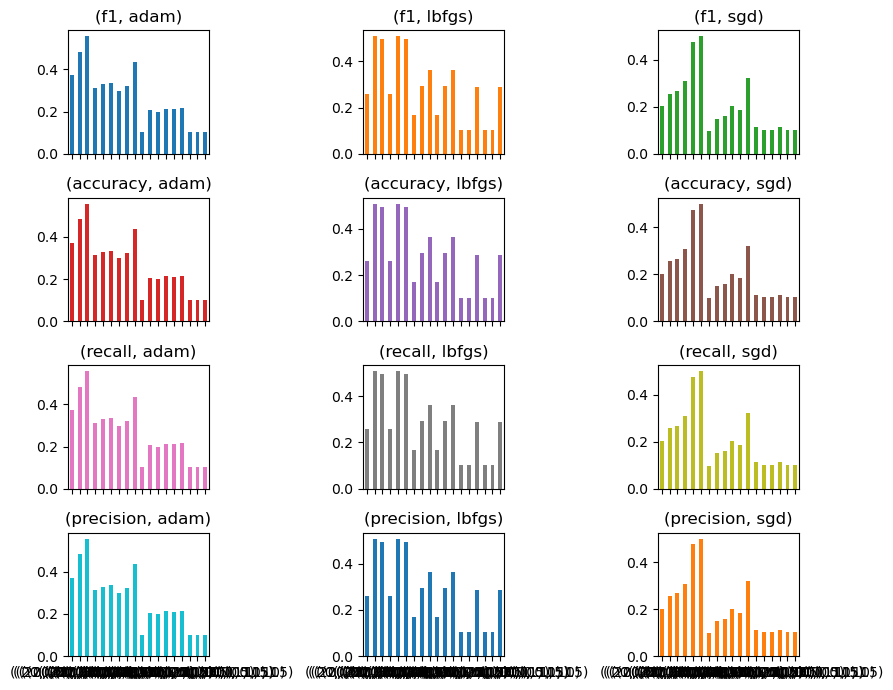

In [219]:
# Number of Layers
scores.unstack(level=3).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(4, 3), legend=False)
plt.tight_layout()